In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
df.shape

(6335, 4)

In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
# Removing the title (we will only use the text)
df.drop(["title"],axis=1,inplace=True)
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6335 non-null   object
 1   label   6335 non-null   object
dtypes: object(2)
memory usage: 99.1+ KB


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['text'] = df['text'].apply(punctuation_removal)
# Check
df.head()

,text,label
0,Daniel Greenfield a Shillman Journalism Fellow...,FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,US Secretary of State John F Kerry said Monday...,REAL
3,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE
4,Its primary day in New York and frontrunners H...,REAL


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,Daniel Greenfield Shillman Journalism Fellow F...,FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,US Secretary State John F Kerry said Monday st...,REAL
3,— Kaydee King KaydeeKing November 9 2016 The l...,FAKE
4,Its primary day New York frontrunners Hillary ...,REAL


label
FAKE    3164
REAL    3171
Name: text, dtype: int64


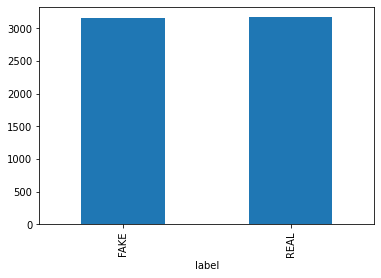

In [ ]:
# How many fake and real articles?
print(df.groupby(['label'])['text'].count())
df.groupby(['label'])['text'].count().plot(kind="bar")
plt.show()

In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
x = df.iloc[: ,0].values

In [ ]:
y = df.iloc[: ,1].values

In [ ]:
# Split the data
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

Confusion matrix, without normalization
0.8642676767676768


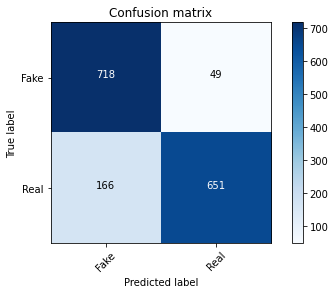

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(x_train_vect,y_train)
y_pred1 = model1.predict(x_test_vect)

cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
 
print(accuracy_score(y_test,y_pred1))

In [ ]:
#Method2

accuracy: 86.99%
Confusion matrix, without normalization


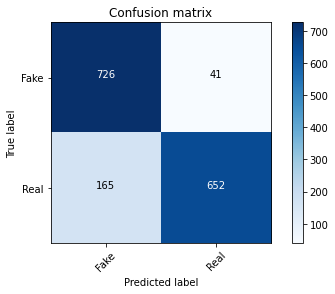

In [ ]:
from sklearn.pipeline import make_pipeline

model2 = make_pipeline(CountVectorizer(),SVC())

# Fitting the model
model2.fit(x_train, y_train)

# Accuracy
y_pred2 = model2.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred2)*100,2)))

cm = metrics.confusion_matrix(y_test,y_pred2)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [ ]:
#Method3

accuracy: 88.26%
Confusion matrix, without normalization


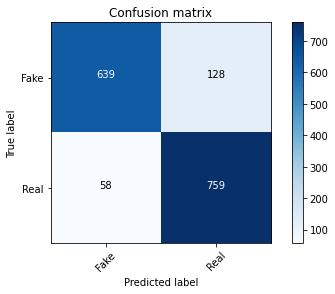

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()

model3.fit(x_train_vect,y_train)

y_pred3 = model3.predict(x_test_vect)

print("accuracy: {}%".format(round(accuracy_score(y_test, y_pred3)*100,2)))
cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [ ]:
#Method 4

Accuracy of SVM Classifier: 88.38%
Confusion matrix, without normalization


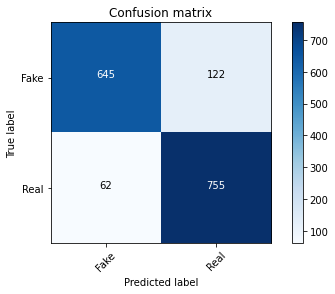

In [ ]:
from sklearn.pipeline import make_pipeline
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train, y_train)

y_pred4 = model4.predict(x_test)

print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, y_pred4)*100,2)))

cm = metrics.confusion_matrix(y_test,y_pred4)
plot_confusion_matrix(cm,classes=['Fake','Real'])

In [ ]:
#Methods    ---    Accuracy
#Method1    ---    86.42
#Method2    ---    86.99
#Method3    ---    88.26
#Method4    ---    88.38

In [ ]:
import joblib
joblib.dump(model4 , 'Fake News Detection')

['Fake News Detection']

In [ ]:
import joblib
text_model = joblib.load('Fake News Detection')

In [ ]:
text_model.predict(['Gaurank wins the medal'])

array(['FAKE'], dtype='<U4')

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%writefile app.py 
import streamlit as st
import joblib
st.title("Fake News Detection ") 
text_model = joblib.load("/content/Fake News Detection") 
#loading the joblib model to use for predicting the output 
ip = st.text_input("Enter the News :")     #Input message 
op = text_model.predict([ip])                 # use the model for predicting the output
if st.button('PREDICT'):                      # create a button called as predict, and if that button is clicked, then display the output 
  st.title(op[0])  #print the output

Overwriting app.py


In [ ]:
!streamlit run app.py &npx localtunnel --port 8501

2022-06-05 17:36:07.268 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.85.217.160:8501

npx: installed 22 in 5.698s
your url is: https://red-buses-notice-34-85-217-160.loca.lt
  Stopping...
^C


In [ ]:
#Create a 1 page word document report about sentiment analysis and twitter sentiments
#(own words/sentences) 
#Twitter is an online micro-blogging and social-networking platform which allows users to write short status updates of maximum length 140 characters. It is a rapidly
#expanding service with over 200 million registered users - out of which 100 million are active users and half of them log on twitter on a daily basis - generating
#nearly 250 million tweets per day. Due to this large amount of usage we hope to achieve a reflection of public sentiment by analysing the sentiments expressed in the
#tweets. Analysing the public sentiment is important for many applications such as firms trying to find out the response of their products in the market, predicting 
#elections and phenomena like stock exchange. Sentiment analysis of public is highly critical in predicting the stock market rate of a particular firm. This could be done by analysing 
#overall public sentiment towards that firm with respect to time and using economics tools for finding the correlation between public sentiment and the firm’s market value. 
#Firms can also estimate how well their product is responding in the market, which areas of the market is it having a favourable response and in which a negative response
#If firms can get this information they can analyze the reasons behind geographically differentiated response, and so they can market their product in a more optimized manner by
#looking for appropriate solutions like creating suitable market segments. Predicting the results of popular political elections and polls is also an emerging application to 
#sentiment analysis. One such study was conducted by Tumasjan et al. in Germany for predicting the outcome of federal elections in which concluded that twitter is a good reflection
#of people sentiment. 
